In [310]:
import pandas as pd
import seaborn as sns
import numpy as np

In [311]:
products_cl = pd.read_csv ("C:/Users/m218101/Desktop/WBS_Coding_school/Course/Python/Project_Eniac_discounts/cleaned_data/products_cl.csv")

In [312]:
orders_qu = pd.read_csv ("C:/Users/m218101/Desktop/WBS_Coding_school/Course/Python/Project_Eniac_discounts/cleaned_data/cleaned_and_qualitychecked_data/orders_qu.csv")

In [313]:
orderlines_qu = pd.read_csv ("C:/Users/m218101/Desktop/WBS_Coding_school/Course/Python/Project_Eniac_discounts/cleaned_data/cleaned_and_qualitychecked_data/orderlines_qu.csv")

In [314]:
orderlines_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                53231 non-null  int64  
 1   id_order          53231 non-null  int64  
 2   product_id        53231 non-null  int64  
 3   product_quantity  53231 non-null  int64  
 4   sku               53231 non-null  object 
 5   unit_price        53231 non-null  float64
 6   date              53231 non-null  object 
 7   unit_price_total  53231 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 3.2+ MB


In [315]:
products_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9992 non-null   object 
 1   name      9992 non-null   object 
 2   desc      9992 non-null   object 
 3   price     9992 non-null   float64
 4   in_stock  9992 non-null   int64  
 5   type      9946 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.5+ KB


In [316]:
orders_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40985 entries, 0 to 40984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      40985 non-null  int64  
 1   created_date  40985 non-null  object 
 2   total_paid    40985 non-null  float64
 3   state         40985 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB


In [317]:
orderlines_products_merge = orderlines_qu.merge(products_cl, how='inner', on='sku')

In [318]:
ol_pr_o = orderlines_products_merge.merge(orders_qu, how='inner', left_on='id_order', right_on='order_id')

In [319]:
ol_pr_o.head(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total,name,desc,price,in_stock,type,order_id,created_date,total_paid,state
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,299545,2017-01-01 01:51:47,51.48,Completed


In [320]:
ol_pr_o = ol_pr_o.drop(columns=['id', 'product_id', 'in_stock', 'order_id'])

In [321]:
ol_pr_o["discounts"] = ol_pr_o["price"] - ol_pr_o["unit_price"]

In [322]:
ol_pr_o["discounts_%"] = (ol_pr_o["price"] - ol_pr_o["unit_price"])/ol_pr_o["price"]*100

In [323]:
ol_pr_o.nlargest(3, "discounts").head(3)

,id_order,product_quantity,sku,unit_price,date,unit_price_total,name,desc,price,type,created_date,total_paid,state,discounts,discounts_%
45066,382526,1,PAC2067,479.0,2017-07-26 19:41:00,479.0,"Second hand - Apple iMac 24 ""Core 2 Duo 28 GHz...",Computer Refurbished iMac 24 inch Core 2 Duo 2...,1799.0,1282,2017-07-30 13:05:09,479.0,Completed,1320.0,73.374097
42743,364414,1,PAC2071,489.0,2017-06-11 12:34:44,489.0,"Second hand - Apple iMac 24 ""Core 2 Duo 28 GHz...",Computer Refurbished iMac 24 inch Core 2 Duo 2...,1799.0,1282,2017-06-11 12:45:07,489.0,Completed,1310.0,72.818232
41759,357485,1,PAC2065,499.0,2017-05-20 07:18:41,499.0,"Second hand - Apple iMac 24 ""Core 2 Duo 28 GHz...",Computer Refurbished iMac 24 inch Core 2 Duo 2...,1799.0,1282,2017-05-20 07:22:22,499.0,Completed,1300.0,72.262368


In [324]:
ol_pr_o['created_date'] = pd.to_datetime(ol_pr_o['created_date'])

In [325]:
total_paid_sum_month = ol_pr_o.resample('M', on='created_date')['total_paid'].sum().reset_index()
total_paid_sum_month

,created_date,total_paid
0,2017-01-31,965497.01
1,2017-02-28,502759.78
2,2017-03-31,37371.60
3,2017-04-30,338744.21
4,2017-05-31,483150.68
5,2017-06-30,448151.08
6,2017-07-31,905412.61
7,2017-08-31,545302.26
8,2017-09-30,592130.14
9,2017-10-31,826079.22


In [326]:
total_paid_sum_month_2=(
     ol_pr_o
    .groupby(ol_pr_o.created_date.dt.strftime("%Y-%m"))
    #.agg({'ord_TotlPaid': [('total_rev', 'sum')], 'ORD_ID': [('total_orders', 'count')]})
    .agg({'total_paid': 'sum', 'id_order':'count'})
    #.agg(total_rev =("tmp_ord_Rev","sum"))
    .reset_index()
)
total_paid_sum_month_2

,created_date,total_paid,id_order
0,2017-01,965497.01,6008
1,2017-02,502759.78,2600
2,2017-03,37371.60,215
3,2017-04,338744.21,1875
4,2017-05,483150.68,2148
5,2017-06,448151.08,1733
6,2017-07,905412.61,4137
7,2017-08,545302.26,2702
8,2017-09,592130.14,2476
9,2017-10,826079.22,3593


In [327]:
total_paid_sum_month3=ol_pr_o.groupby(ol_pr_o.created_date.dt.strftime("%Y-%m")).agg({'total_paid': 'sum', 'id_order':'count'}).reset_index()
total_paid_sum_month3

,created_date,total_paid,id_order
0,2017-01,965497.01,6008
1,2017-02,502759.78,2600
2,2017-03,37371.60,215
3,2017-04,338744.21,1875
4,2017-05,483150.68,2148
5,2017-06,448151.08,1733
6,2017-07,905412.61,4137
7,2017-08,545302.26,2702
8,2017-09,592130.14,2476
9,2017-10,826079.22,3593


In [328]:
total_paid_sum_month4= ol_pr_o.groupby(ol_pr_o['created_date'].dt.strftime("%Y-%m")).agg(tps =('total_paid','sum')).reset_index()
total_paid_sum_month4

,created_date,tps
0,2017-01,965497.01
1,2017-02,502759.78
2,2017-03,37371.60
3,2017-04,338744.21
4,2017-05,483150.68
5,2017-06,448151.08
6,2017-07,905412.61
7,2017-08,545302.26
8,2017-09,592130.14
9,2017-10,826079.22


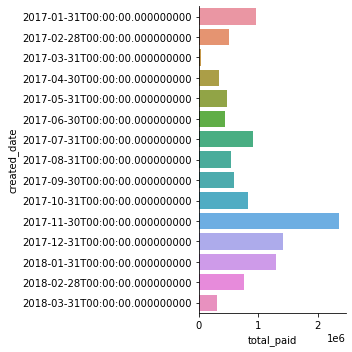

In [329]:
sns.catplot(kind='bar',
            data=total_paid_sum_month,
            x='total_paid',
            y='created_date')

In [330]:
ol_pr_o.shape

(53231, 15)

<AxesSubplot:>

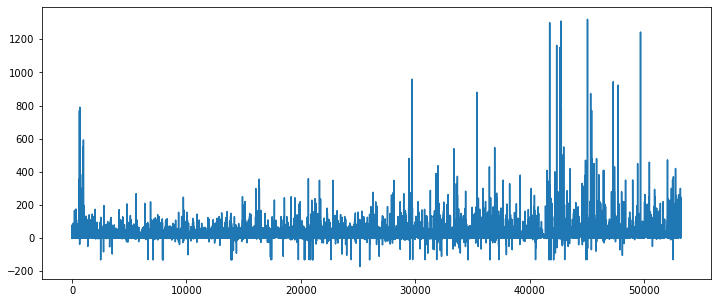

In [331]:
ol_pr_o["discounts"].plot(figsize=(12,5))

In [332]:
ol_pr_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53231 entries, 0 to 53230
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_order          53231 non-null  int64         
 1   product_quantity  53231 non-null  int64         
 2   sku               53231 non-null  object        
 3   unit_price        53231 non-null  float64       
 4   date              53231 non-null  object        
 5   unit_price_total  53231 non-null  float64       
 6   name              53231 non-null  object        
 7   desc              53231 non-null  object        
 8   price             53231 non-null  float64       
 9   type              53220 non-null  object        
 10  created_date      53231 non-null  datetime64[ns]
 11  total_paid        53231 non-null  float64       
 12  state             53231 non-null  object        
 13  discounts         53231 non-null  float64       
 14  discounts_%       5323

In [333]:
ol_pr_o.groupby("type").count()

,id_order,product_quantity,sku,unit_price,date,unit_price_total,name,desc,price,created_date,total_paid,state,discounts,discounts_%
type,,,,,,,,,,,,,,
"1,44E+11",101,101,101,101,101,101,101,101,101,101,101,101,101,101
10142,802,802,802,802,802,802,802,802,802,802,802,802,802,802
101781405,102,102,102,102,102,102,102,102,102,102,102,102,102,102
10230,182,182,182,182,182,182,182,182,182,182,182,182,182,182
106431714,196,196,196,196,196,196,196,196,196,196,196,196,196,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79201715,3,3,3,3,3,3,3,3,3,3,3,3,3,3
85641716,300,300,300,300,300,300,300,300,300,300,300,300,300,300
85651716,182,182,182,182,182,182,182,182,182,182,182,182,182,182


In [334]:
db_types=round(
    ol_pr_o.groupby("type")
    .agg( unit_price_total_avg=('unit_price_total','mean'),
          total_paid_sum=('total_paid','sum'),
          price_mean=('price','mean'),
          unit_price_mean=('unit_price','mean'),
          product_quantity_sum=('product_quantity','sum'),
          NumUniqidOrder=('id_order',pd.Series.nunique),
          NumUniqsku=('sku',pd.Series.nunique),
          Name_longest=('name','max'),
          Descr_longest=('desc','max')
        )
    #.nlargest(10,'product_quantity_sum')
    .reset_index()
)

In [335]:
db_types=(db_types.assign(Discounts_perc_mean = np.where((db_types.price_mean==0.0),100,round
                                                          (((db_types.price_mean-db_types.unit_price_mean)/db_types.price_mean)*100,2))))

In [336]:
db_types.head(3)

,type,unit_price_total_avg,total_paid_sum,price_mean,unit_price_mean,product_quantity_sum,NumUniqidOrder,NumUniqsku,Name_longest,Descr_longest,Discounts_perc_mean
0,"1,44E+11",81.0,10485.0,73.0,81.0,101,93,21,iPhone 5s battery repair,Repair service including parts and labor for i...,-10.96
1,10142,100.0,117783.0,119.0,95.0,843,790,22,"Open - NewerTech NuPower Battery MacBook 13 ""w...",lithium battery and 7.6V 39W MacBook Air 11 in...,20.17
2,101781405,20.0,6688.0,19.0,18.0,125,100,8,Wacom parts 5 points for CTH670,Wireless Kit Wacom graphics tablets.,5.26


In [337]:
db_types_my=round(
    ol_pr_o.groupby("type")
     .agg(discounts_perc_mean=('discounts_%','mean'), 
          unit_price_total_avg=('unit_price_total','mean'),
          total_paid_sum=('total_paid','sum'),
          price_mean=('price','mean'),
          unit_price_mean=('unit_price','mean'),
          product_quantity_sum=('product_quantity','sum'),
          NumUniqidOrder=('id_order',pd.Series.nunique),
          NumUniqsku=('sku',pd.Series.nunique),
          Name_longest=('name','max'),
          Descr_longest=('desc','max')
        )
    #.nlargest(10,'product_quantity_sum')
    .reset_index()
)

In [338]:
db_types_time=round(
    ol_pr_o.groupby([ol_pr_o["created_date"].dt.strftime('%Y-%m'),ol_pr_o["type"]])
    .agg( discounts_perc_mean=('discounts_%','mean'),
          unit_price_total_avg=('unit_price_total','mean'),
          total_paid_sum=('total_paid','sum'),
          price_mean=('price','mean'),
          unit_price_mean=('unit_price','mean'),
          product_quantity_sum=('product_quantity','sum'),
          NumUniqidOrder=('id_order',pd.Series.nunique),
          NumUniqsku=('sku',pd.Series.nunique),
          Name_longest=('name','max'),
          Descr_longest=('desc','max')
        )
    #.nlargest(10,'product_quantity_sum')
    .reset_index()
)

In [339]:
round(db_types_time.describe())

,discounts_perc_mean,unit_price_total_avg,total_paid_sum,price_mean,unit_price_mean,product_quantity_sum,NumUniqidOrder,NumUniqsku
count,1275.0,1275.0,1275.0,1275.0,1275.0,1275.0,1275.0,1275.0
mean,18.0,194.0,9252.0,222.0,185.0,47.0,40.0,15.0
std,15.0,243.0,17225.0,283.0,236.0,85.0,69.0,25.0
min,-30.0,5.0,13.0,6.0,5.0,1.0,1.0,1.0
25%,8.0,34.0,684.0,43.0,33.0,4.0,4.0,2.0
50%,17.0,79.0,2703.0,89.0,75.0,15.0,14.0,6.0
75%,25.0,244.0,9626.0,274.0,226.0,51.0,46.0,17.0
max,86.0,1364.0,166701.0,1499.0,999.0,726.0,600.0,280.0


In [340]:
db_types_time['type'].value_counts().head(10)

1,44E+11    15
5398        15
13005399    15
1325        15
1334        15
13555403    15
13615399    15
54085407    15
1364        15
13835403    15
Name: type, dtype: int64

In [341]:
db_types_time.loc[db_types_time["type"] == "11865403"].value_counts().head(1)

created_date  type      discounts_perc_mean  unit_price_total_avg  total_paid_sum  price_mean  unit_price_mean  product_quantity_sum  NumUniqidOrder  NumUniqsku  Name_longest                                             Descr_longest                                         
2017-01       11865403  33.0                 28.0                  33441.0         36.0        25.0             463                   383             206         Wowewa Protector Tempered Glass iPhone 6s Plus / 6 Plus  zippered sleeve type card case book for iPhone 6 Plus.    1
dtype: int64

In [346]:
db_types_time.nlargest(15, "discounts_perc_mean")

,created_date,type,discounts_perc_mean,unit_price_total_avg,total_paid_sum,price_mean,unit_price_mean,product_quantity_sum,NumUniqidOrder,NumUniqsku,Name_longest,Descr_longest
863,2017-11,13955395,86.0,7.0,39.0,35.0,5.0,4,3,1,Like new - Apple iPad Camera Connection Kit,Reconditioned Adapter Compatible digital camer...
963,2017-12,13955395,86.0,7.0,81.0,35.0,5.0,4,3,1,Like new - Apple iPad Camera Connection Kit,Reconditioned Adapter Compatible digital camer...
1057,2018-01,13955395,86.0,5.0,78.0,35.0,5.0,4,4,1,Like new - Apple iPad Camera Connection Kit,Reconditioned Adapter Compatible digital camer...
1159,2018-02,1515,82.0,13.0,3776.0,75.0,12.0,147,118,17,Xtorm XB103 Qi Wireless Power Bank Fast charge,portable charger with 6700mAh capacity and Mic...
892,2017-11,"5,43E+15",81.0,250.0,842.0,1299.0,250.0,3,3,3,"Second hand - Apple iMac 20 ""Core 2 Duo 226GHz...",Refurbished iMac 20 inch Core 2 Duo | 2GB RAM ...
702,2017-09,"5,43E+15",78.0,263.0,1073.0,1199.0,263.0,4,4,3,"Second hand - Apple iMac 20 ""Core 2 Duo 226GHz...",Refurbished iMac 20 inch Core 2 Duo | 2GB RAM ...
798,2017-10,51882158,78.0,336.0,364.0,1499.0,336.0,1,1,1,"Second hand - Apple iMac 20 ""Core 2 Duo 266GHz...",IMac used 20 inch Core 2 Duo 266GHz | 4GB RAM ...
440,2017-06,"5,43E+15",77.0,349.0,356.0,1499.0,349.0,1,1,1,"Second hand - Apple iMac 20 ""Core 2 Duo 24GHz ...",Refurbished iMac 20 inch Core 2 Duo 24GHz | 4G...
792,2017-10,"5,43E+15",77.0,271.0,2210.0,1199.0,271.0,8,8,2,"Second hand - Apple iMac 20 ""Core 2 Duo 226GHz...",Refurbished iMac 20 inch Core 2 Duo | 2GB RAM ...
744,2017-10,12575403,73.0,24.0,7510.0,82.0,23.0,152,137,5,Zagg iPad Messenger Universal Keyboard Pro 129...,Spanish Bluetooth keyboard for iPad Pro resist...


In [280]:
db_types_my.head(1)

,type,discounts_perc_mean,unit_price_total_avg,total_paid_sum,price_mean,unit_price_mean,product_quantity_sum,NumUniqidOrder,NumUniqsku,Name_longest,Descr_longest
0,"1,44E+11",-11.0,81.0,10485.0,73.0,81.0,101,93,21,iPhone 5s battery repair,Repair service including parts and labor for i...


In [430]:
db_types_my.nlargest(30, "discounts_perc_mean").type.unique()

array(['5,43E+15', '51882158', '13955395', '12575403', '54025401', '1515',
       '5,45E+15', '1230', '5,72E+15', '21571716', '2425', '12051714',
       '1392', '9094', '1298', '14035403', '21622158', '24215399',
       '11865403', '5,49E+11', '79201715', '12755395', '13835403', '2434',
       '42945397', '5384', '5403', '2,16E+11', '5405', '5720'],
      dtype=object)

<AxesSubplot:xlabel='discounts_perc_mean', ylabel='type'>

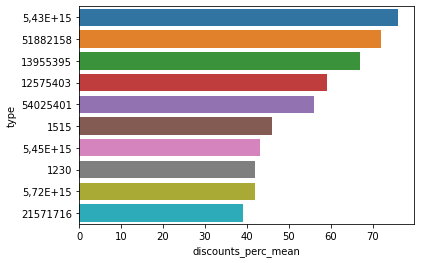

In [348]:
sns.barplot(data=db_types_my.nlargest(10, 'discounts_perc_mean'), #catplot
            y='type',
            x='discounts_perc_mean')
# they all reproduce second hand iPhones, Macs, Apple products
#db_types_my.nlargest(10, "discounts_perc_mean")

In [495]:
db_types_time.loc[db_types_time["type"] == "21571716", :].sample(2)#value_counts().head(1)

,created_date,type,discounts_perc_mean,unit_price_total_avg,total_paid_sum,price_mean,unit_price_mean,product_quantity_sum,NumUniqidOrder,NumUniqsku,Name_longest,Descr_longest
518,2017-07,21571716,37.0,469.0,938.0,749.0,469.0,2,2,1,Like new - Apple iPhone 6 Plus 16GB Space Gray,Apple iPhone 6 Plus Free Refurbished 16GB Spac...
691,2017-09,21571716,44.0,525.0,1051.0,929.0,525.0,2,2,2,Like new - Apple iPhone 6 Plus 64GB Silver,Apple iPhone 6 Plus Free Refurbished 64GB Colo...


In [378]:
db_types_my['Name_longest'].str.contains('Second hand', 'Like new').count()

114

In [439]:
db_types_my.loc[db_types_my["Name_longest"].str.contains("Second hand|Like new"), :].type.unique()
#there is 24 types

array(['113271716', '113851714', '11821715', '12031714', '12051714',
       '12141714', '1282', '13621714', '13955395', '2,17E+11', '21561716',
       '21571716', '21622158', '24821716', '4259', '42931714', '5,43E+15',
       '5,44E+11', '5,45E+15', '5,72E+15', '51861714', '51882158',
       '79201715', '85641716'], dtype=object)

In [468]:
#db_types_my.loc[db_types_my["Name_longest"].str.contains("Open"), :].type.unique()
#15 types

array(['10142', '106431714', '113281716', '113291716', '113464259',
       '1364', '1714', '1716', '24811716', '24885185', '51871714', '5401',
       '54025401', '85651716'], dtype=object)

In [423]:
db_types_my.loc[db_types_my["Name_longest"].str.contains("Repair"), :].type.unique()
#15 types

array(['12645406'], dtype=object)

In [473]:
db_types_my['category'] = ""

In [474]:
db_types_my.loc[db_types_my["Name_longest"].str.contains("Second hand|Like new"), "category"] = "Second hand"

In [415]:
#db_types_my.loc[db_types_my["Name_longest"].str.contains("Open"), "category"] = "Open"

In [475]:
db_types_my.loc[db_types_my["Name_longest"].str.contains("Repair"), "category"] = "Repair"

In [476]:
db_types_my.loc[db_types_my["Name_longest"].str.contains("Keyboard|keyboard"), "category"] = "Keyboard"

In [480]:
db_types_my.loc[db_types_my["Name_longest"].str.contains("Power Bank|External Battery|Power battery|Batterry|battery"), "category"] = "Battery, Power Bank"

In [512]:
db_types_my.loc[db_types_my["Name_longest"].str.contains("cable|connector|lightning to usb|wall socket|power strip"), "category"] = "Cable"

In [479]:
db_types_my.loc[db_types_my["Name_longest"].str.contains("Camera|camera"), "category"] = "Camera"

In [ ]:
db_types_my.loc[db_types_my["Name_longest"].str.contains("Camera|camera"), "category"] = "Camera"

In [ ]:
db_types_my.loc[db_types_my["Name_longest"].str.contains("^.{0,7}apple iphone"), "category"] = "iphone"

In [ ]:
db_types_my.loc[db_types_my["Name_longest"].str.contains("^.{0,7}apple ipod"), "category"] = "ipod"

In [ ]:
db_types_my.loc[db_types_my["Name_longest"].str.contains("^.{0,7}apple ipad|tablet"), "category"] = "tablet"

In [513]:
db_types_my.loc[db_types_my["Name_longest"].str.contains("protect|cover|sleeve|screensaver|shell"), "category"] = "protection"

In [514]:
db_types_my.loc[db_types_my["Name_longest"].str.contains("nas|server|raid|synology"), "category"] = "server"

In [481]:
db_types_my.loc[db_types_my["type"]=="11865403", "category"] = "iPhone_accessories"

In [482]:
db_types_my.loc[db_types_my["type"]=="1217539", "category"] = "Servers"

In [484]:
db_types_my.loc[db_types_my["type"]=="1298", "category"] = "Open items"

In [485]:
db_types_my.loc[db_types_my["type"]=="11935397", "category"] = "Hard drive, USB"

In [497]:
db_types_my.sample(3)

,type,discounts_perc_mean,unit_price_total_avg,total_paid_sum,price_mean,unit_price_mean,product_quantity_sum,NumUniqidOrder,NumUniqsku,Name_longest,Descr_longest,category
93,51882158,72.0,423.0,4163.0,1349.0,371.0,9,7,4,"Second hand - Apple iMac 20 ""Core 2 Duo 266GHz...",Refurbished iMac 20 inch Core 2 Duo 266GHz | 4...,Second hand
59,1433,21.0,227.0,194704.0,283.0,222.0,729,699,99,Samsung SSD 850 expansion kit PRO 256GB + Dat...,expansion SSD 512GB + 16GB 1333MHZ RAM + Datad...,
45,13621714,3.0,495.0,20045.0,510.0,495.0,35,35,6,Like new - Apple iPad Mini 4 Wi-Fi + Cellular ...,Refurbished Apple iPad mini Wi-Fi + 4 Cellular...,Second hand


In [489]:
db_types_my.category.unique()

array(['Battery, Power Bank', '', 'Second hand', 'iPhone_accessories',
       'Hard drive, USB', 'Cable', 'Keyboard', 'Repair', 'Open items',
       'Camera'], dtype=object)

In [621]:
import matplotlib.pyplot as plt

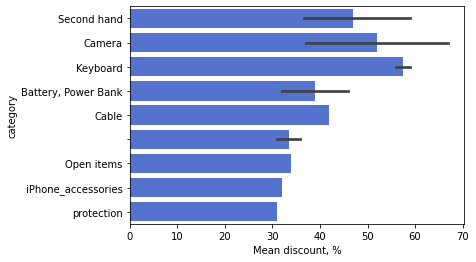

In [622]:
aa = sns.barplot(data=db_types_my.nlargest(25, 'discounts_perc_mean'), #catplot
#sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)  
            y='category',
            x='discounts_perc_mean',
            color = 'royalblue')#'cornflowerblue'
aa.set(xlabel='Mean discount, %', ylabel='category')
plt.savefig("cat_disc.png");          

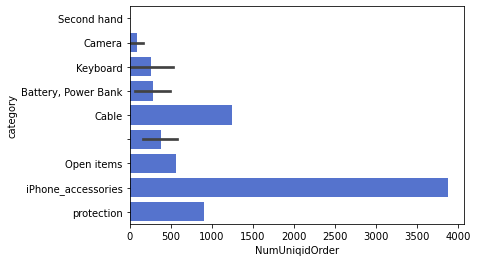

In [623]:
sns.barplot(data=db_types_my.nlargest(25, 'discounts_perc_mean'), #catplot
            y='category',
            x='NumUniqidOrder',
            color = 'royalblue')
aa.set(xlabel='Number of unique orders', ylabel='category')
plt.savefig("cat_NumUniqueOrder.png");

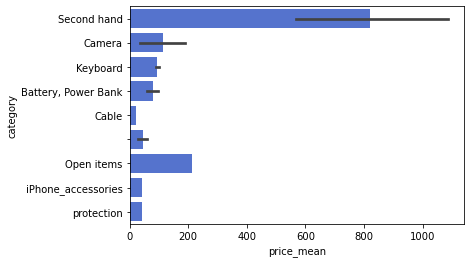

In [624]:
sns.barplot(data=db_types_my.nlargest(25, 'discounts_perc_mean'), #catplot
            y='category',
            x='price_mean',
            color = 'royalblue')
aa.set(xlabel='Mean price', ylabel='category')
plt.savefig("cat_price_mean.png");

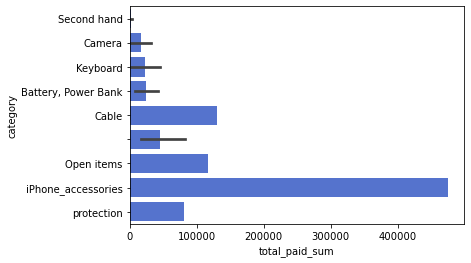

In [626]:
sns.barplot(data=db_types_my.nlargest(25, 'discounts_perc_mean'), #catplot
            y='category',
            x='total_paid_sum',
            color = 'royalblue')
aa.set(xlabel='Total paid, sum', ylabel='category')
plt.savefig("cat_total_paid_sum.png");

In [555]:
db_types_my.loc[db_types_my["type"] == "1231", :].sample(1)

,type,discounts_perc_mean,unit_price_total_avg,total_paid_sum,price_mean,unit_price_mean,product_quantity_sum,NumUniqidOrder,NumUniqsku,Name_longest,Descr_longest,category
26,1231,22.0,81.0,201642.0,97.0,76.0,1219,1085,8,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,


In [549]:
db_types_my.loc[db_types_my["type"].str.contains("5,74"), :].sample(1)

ValueError: a must be greater than 0 unless no samples are taken

In [249]:
round(db_types_my.describe())

,discounts_perc_mean,unit_price_total_avg,total_paid_sum,price_mean,unit_price_mean,product_quantity_sum,NumUniqidOrder,NumUniqsku
count,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0
mean,20.0,232.0,103475.0,289.0,224.0,526.0,442.0,45.0
std,15.0,262.0,170116.0,339.0,258.0,886.0,716.0,89.0
min,-11.0,6.0,97.0,6.0,5.0,1.0,1.0,1.0
25%,10.0,40.0,6087.0,53.0,39.0,22.0,22.0,5.0
50%,18.0,96.0,26963.0,110.0,92.0,162.0,159.0,16.0
75%,27.0,397.0,134105.0,452.0,383.0,714.0,614.0,35.0
max,76.0,999.0,984454.0,1349.0,999.0,4593.0,3881.0,698.0


In [245]:
#db_types.nlargest(5, 'total_paid_sum')
db_types_my.loc[db_types['type']=='106431714', :]

,type,discounts_perc_mean,unit_price_total_avg,total_paid_sum,price_mean,unit_price_mean,product_quantity_sum,NumUniqidOrder,NumUniqsku,Name_longest,Descr_longest
4,106431714,5.0,806.0,182482.0,845.0,803.0,197,193,20,"Open - Apple iPad Pro 10.5 ""Wi-Fi + Cellular 6...",Pro iPad Wi-Fi refitted with 256GB capacity


In [246]:
db_types_time.head(2)

,created_date,type,discounts_perc_mean,unit_price_total_avg,total_paid_sum,price_mean,unit_price_mean,product_quantity_sum,NumUniqidOrder,NumUniqsku,Name_longest,Descr_longest
0,2017-01,"1,44E+11",-20.0,67.0,1029.0,55.0,67.0,11,10,6,iPhone 5s battery repair,Repair service including parts and labor for i...
1,2017-01,10142,19.0,104.0,7488.0,124.0,100.0,54,51,13,"NewerTech NuPower battery MacBook Pro 17 ""(200...",lithium battery and 7.6V 39W MacBook Air 11 in...


In [65]:
orderlines_products_merge.groupby(["id_order"]).sum().head()   #  .shape  (40985, 5)

,product_quantity,unit_price,unit_price_total,price,discounts
id_order,,,,,
241423,1,129.16,129.16,139.99,10.83
242832,1,10.77,10.77,17.99,7.22
243330,1,77.99,77.99,99.99,22.00
245275,1,149.00,149.00,179.00,30.00
245595,2,52.99,105.98,103.95,50.96


In [71]:
orderlines_products_merge["date"] = pd.to_datetime(orderlines_products_merge["date"])

<AxesSubplot:xlabel='date,date'>

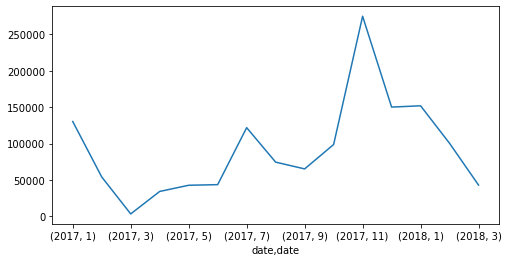

In [73]:
orderlines_products_merge.groupby([orderlines_products_merge["date"].dt.year, orderlines_products_merge["date"].dt.month])["discounts"].sum().plot(figsize=(8,4))

In [70]:
orderlines_products_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53231 entries, 0 to 53230
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_order          53231 non-null  int64  
 1   product_quantity  53231 non-null  int64  
 2   sku               53231 non-null  object 
 3   unit_price        53231 non-null  float64
 4   date              53231 non-null  object 
 5   unit_price_total  53231 non-null  float64
 6   name              53231 non-null  object 
 7   desc              53231 non-null  object 
 8   price             53231 non-null  float64
 9   type              53220 non-null  object 
 10  discounts         53231 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 4.9+ MB


In [76]:
orderlines_products_merge.to_csv('orderlines_products_merge.csv')

In [77]:
orderlines_products_merge.groupby(["id_order"]).["date"].agg.dt.date

<bound method DataFrame.info of        id_order  product_quantity        sku  unit_price                date  \
0        299545                 1    OWC0100       47.49 2017-01-01 01:46:16   
1        299404                 1    OWC0100       47.49 2017-01-01 22:50:39   
2        300650                 1    OWC0100       49.99 2017-01-02 15:31:09   
3        300760                 1    OWC0100       49.99 2017-01-02 17:20:31   
4        301975                 1    OWC0100       49.99 2017-01-03 20:04:54   
...         ...               ...        ...         ...                 ...   
53226    526003                 1    NET0028      404.99 2018-03-12 15:59:19   
53227    526066                 1    WAC0254       83.99 2018-03-12 17:45:42   
53228    526093                 1    WAC0252       83.99 2018-03-12 18:32:29   
53229    526440                 1    PAC2235      878.18 2018-03-13 15:08:27   
53230    526512                 1  DLK0044-A       84.32 2018-03-13 16:19:18   

       

In [629]:
db_types_time.head(2)

,created_date,type,discounts_perc_mean,unit_price_total_avg,total_paid_sum,price_mean,unit_price_mean,product_quantity_sum,NumUniqidOrder,NumUniqsku,Name_longest,Descr_longest
0,2017-01,"1,44E+11",-20.0,67.0,1029.0,55.0,67.0,11,10,6,iPhone 5s battery repair,Repair service including parts and labor for i...
1,2017-01,10142,19.0,104.0,7488.0,124.0,100.0,54,51,13,"NewerTech NuPower battery MacBook Pro 17 ""(200...",lithium battery and 7.6V 39W MacBook Air 11 in...


In [638]:
from matplotlib import pyplot as plt

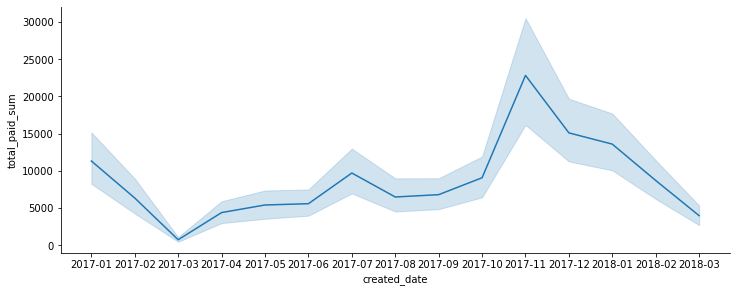

In [648]:
g = sns.relplot(data=db_types_time, y='total_paid_sum', x='created_date', kind='line')
g.fig.set_figwidth(12)
g.fig.set_figheight(4)
#plt.figure(figsize=(5,20));

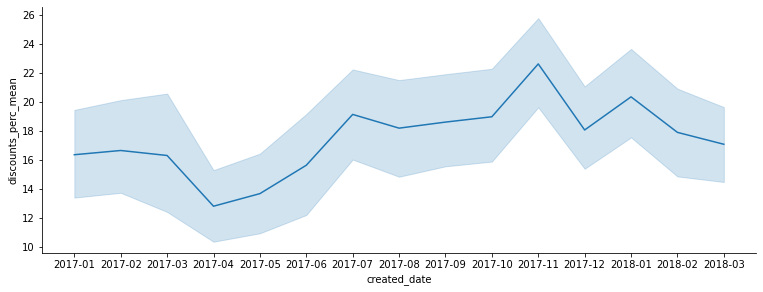

In [661]:
g = sns.relplot(data=db_types_time, y='discounts_perc_mean', x='created_date', kind='line')
g.fig.set_figwidth(12)
g.fig.set_figheight(4)

In [653]:
type118 = db_types_time.loc[db_types_time["type"] == "11865403", :]

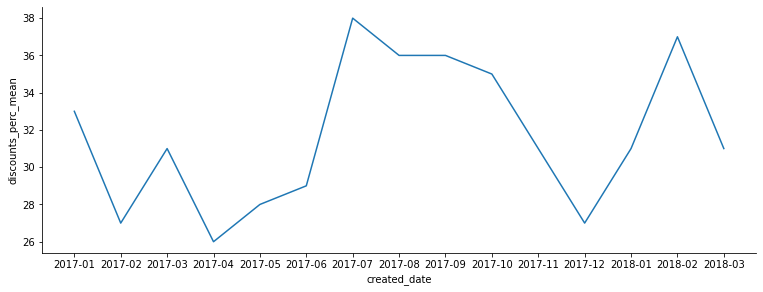

In [656]:
g = sns.relplot(data=type118, y='discounts_perc_mean', x='created_date', kind='line')
g.fig.set_figwidth(12)
g.fig.set_figheight(4)

In [ ]:
db_types_time['type'] = pd.to_numeric(db_types_time['type'], errors='coerce').astype('float')

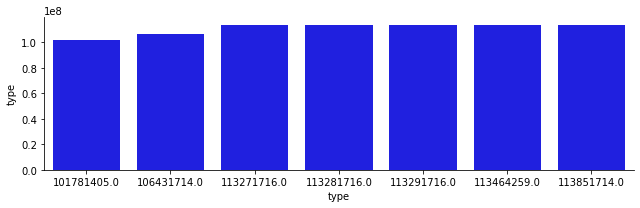

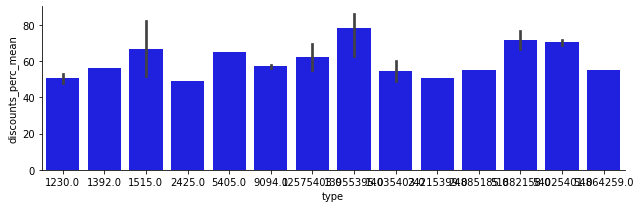

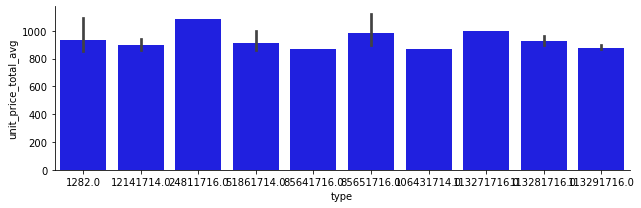

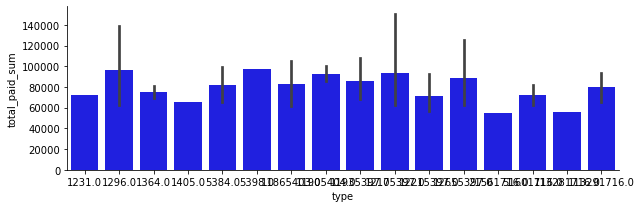

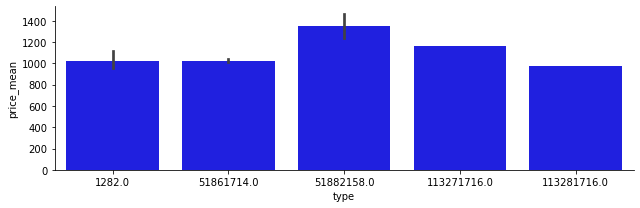

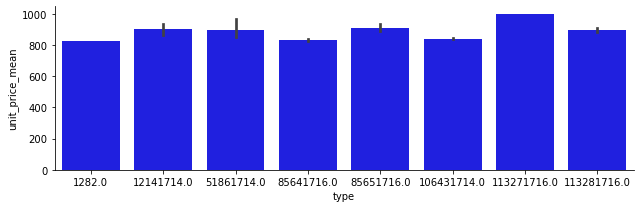

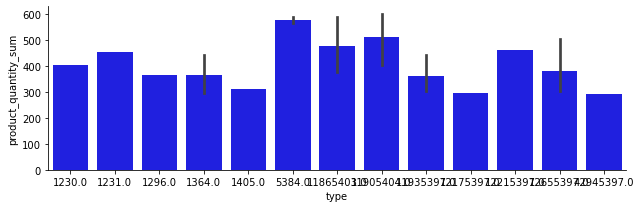

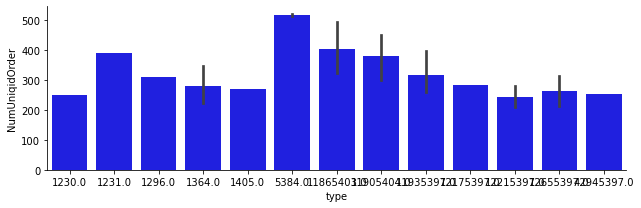

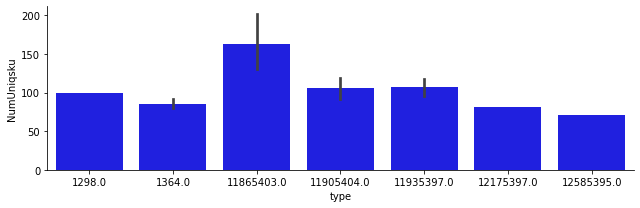

In [684]:
for col in db_types_time.columns:
    if (col == "created_date"
    or col == "Name_longest"
    or col == "Descr_longest"):
        continue
    df=db_types_time.nlargest(40, columns=col)
    ordx=db_types_time.nlargest(40, columns=col).index
    sns.catplot(data=df,
                kind="bar",
                x="type",
                y=col,
                legend=False,
                color="blue",
             #   pallete="plasma",
                height=3,
                aspect=3)
plt.show()

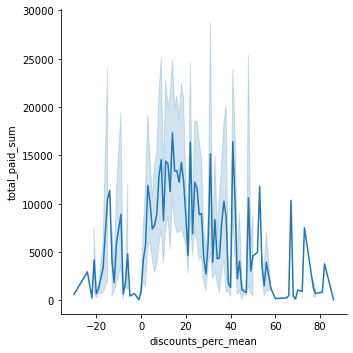

In [685]:
sns.relplot(data=db_types_time,
           kind="line",
           x="discounts_perc_mean",
           y="total_paid_sum")

In [666]:
db_types_time.info()df['Customer Number'].astype('int')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   created_date          1275 non-null   object 
 1   type                  1275 non-null   object 
 2   discounts_perc_mean   1275 non-null   float64
 3   unit_price_total_avg  1275 non-null   float64
 4   total_paid_sum        1275 non-null   float64
 5   price_mean            1275 non-null   float64
 6   unit_price_mean       1275 non-null   float64
 7   product_quantity_sum  1275 non-null   int64  
 8   NumUniqidOrder        1275 non-null   int64  
 9   NumUniqsku            1275 non-null   int64  
 10  Name_longest          1275 non-null   object 
 11  Descr_longest         1275 non-null   object 
dtypes: float64(5), int64(3), object(4)
memory usage: 119.7+ KB


In [671]:
db_types_time['type'] = pd.to_numeric(db_types_time['type'], errors='coerce').astype('float')

In [674]:
db_types_time.head(3)

,created_date,type,discounts_perc_mean,unit_price_total_avg,total_paid_sum,price_mean,unit_price_mean,product_quantity_sum,NumUniqidOrder,NumUniqsku,Name_longest,Descr_longest
0,2017-01,NaN,-20.0,67.0,1029.0,55.0,67.0,11,10,6,iPhone 5s battery repair,Repair service including parts and labor for i...
1,2017-01,10142.0,19.0,104.0,7488.0,124.0,100.0,54,51,13,"NewerTech NuPower battery MacBook Pro 17 ""(200...",lithium battery and 7.6V 39W MacBook Air 11 in...
2,2017-01,101781405.0,5.0,20.0,960.0,19.0,18.0,19,14,3,Wacom parts 5 points for CTH670,Wireless Kit Wacom graphics tablets.
